In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import division
import astropy.constants as const

#mpl.rcParams.update({'text.usetex': True})

In [2]:
h = const.h.cgs.value
c = const.c.cgs.value
k = const.k_B.cgs.value

**Write an IDL function planck,temp,wav in cgs units. The required constants are given in Table 2 on page 14. For temp=5000 and wav=5000e-8 (5000 Angstrom), in the yellow part of the visible wavelength region and at about the sensitivity peak of your eyes) it should give:**

In [3]:
def planck(temp, wav):
    b = (2*h*c**2/wav**5) / (np.exp((h*c)/(wav*k*temp)) - 1)
    return b

In [4]:
print planck(5000,5000e-8)

1.21071855235e+14


**Use it to plot Planck curves against wavelength in the visble part of the spectrum for different stellarlike temperatures, for example with the following statements in a main IDL file SSA3.PRO:**

In [5]:
wav = np.arange(100)*200. + 1000.

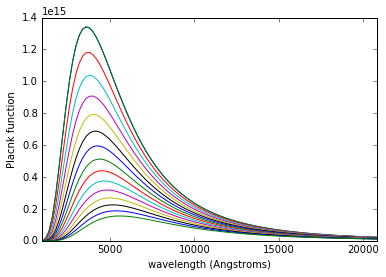

In [6]:
b = np.zeros_like(wav)

for i in range(100):
    b[i] = planck(8000,wav[i]*1e-8)

plt.plot(wav,b)
plt.xlabel(r'wavelength (Angstroms)')
plt.ylabel(r'Placnk function')
plt.xlim([wav.min(),wav.max()])

for T in range(8000,5000,-200):
    for i in range(100):
        b[i] = planck(T,wav[i]*1e-8)
    plt.plot(wav,b)

**Study the Planck function properties. B(T) increases at any wavelength with the temperature, but
much faster (exponentially, Wien regime) at short wavelengths then at long wavelengths (linearly,
Rayleigh-Jeans regime). The peak divides the two regimes and shifts to shorter wavelengths for
higher temperature (Wien displacement law). The spectrum-integrated Planck function (area under
the curve in this linear plot) increases steeply with temperature (Stefan-Boltzmann law).**

**Add ,/ylog to the plot statement to make the y-axis logarithmic. Inspect the result. Then make the
x-axis also logarithmic and inspect the result. Explain the slopes of the righthand part.**

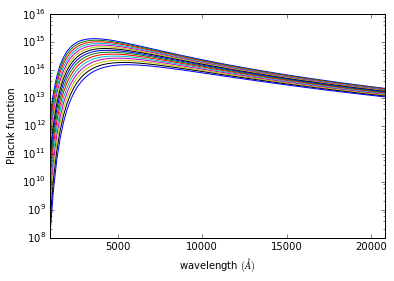

In [7]:
plt.figure()
plt.xlabel(r'wavelength $(\AA)$')
plt.ylabel('Placnk function')
plt.xlim([wav.min(),wav.max()])

for T in range(8000,5000,-200):
    for i in range(100):
        b[i] = planck(T,wav[i]*1e-8)
    plt.semilogy(wav,b)


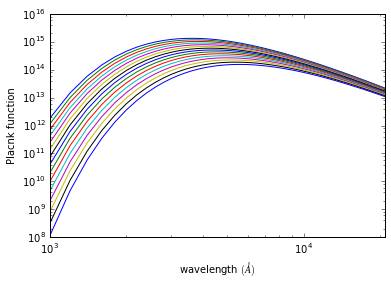

In [8]:
#plt.plot(wav,b)
plt.xlabel(r'wavelength $(\AA)$')
plt.ylabel('Placnk function')
plt.xlim([wav.min(),wav.max()])

for T in range(8000,5000,-200):
    for i in range(100):
        b[i] = planck(T,wav[i]*1e-8)
    plt.loglog(wav,b)


The right hand part of the spectrum is the Raleigh-Jeans regime where $hc/\lambda  >> kT$ and $B(T) \rightarrow T/\lambda^{4}$ so in log space it has a constant slope.

# 3.2 Radiation through an isothermal layer

**Derive (11) from (10).**

Since the layer is isothermal $B_{\lambda}(T)$ is constant accross the layer. Then eq. 10:

$$ I_{\lambda} = I_{\lambda}(0)e^{-\tau} + \int_{0}^{\tau}  B_{\lambda}[T(x)]e^{(\tau - \tau(x))} d\tau(x)$$

becomes:

$$ \int_{0}^{\tau} e^{(\tau - \tau(x))} d\tau(x) = 1 = e^{-\tau} $$ Thus:

$$ I_{\lambda} = I_{\lambda}(0)e^-{\tau} + B_{\lambda}(1 - e^{-\tau}) $$

**Make plots of the emergent intesity $I_{\lambda}$ for given values of $B_{\lambda}$ and $I_{\lambda}(0)$ against $\tau$:**

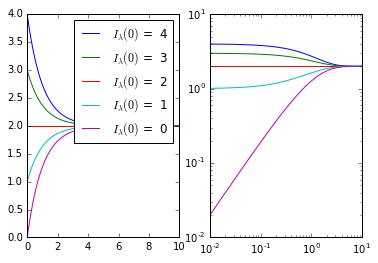

In [9]:
plt.figure()
plt.xlabel(r'$\tau$')
plt.ylabel('Intensity')


B = 2.
tau = np.arange(0.01,10,0.01) # set array tau = 0.01-10 in steps 0.01
integ = np.zeros_like(tau) # declare float array of the same size


for I0 in range(4,-1,-1): # step down from I0=4 to I0=0
    for i,t in enumerate(tau):
        integ[i]=I0 * np.exp(-t) + B*(1-np.exp(-t))
    if (I0 == 4):
        plt.subplot(121)
        plt.plot(tau,integ, label=r'$I_{\lambda}(0)$ = %2d' %I0)
    if (I0 != 4):
        plt.subplot(121)
        plt.plot(tau,integ, label=r'$I_{\lambda}(0)$ = %2d' %I0)

plt.legend()        
for I0 in range(4,-1,-1): # step down from I0=4 to I0=0
    for i,t in enumerate(tau):
        integ[i]=I0 * np.exp(-t) + B*(1-np.exp(-t))
    if (I0 == 4):
        plt.subplot(122)
        plt.loglog(tau,integ, label=r'$I$ = %2d' %I0)
    if (I0 != 4):
        plt.subplot(122)
        plt.loglog(tau,integ, label=r'$I$ = %2d' %I0)



**How does $I_{\lambda}$ depend on $\tau$ for $\tau \ll 1$ when $I_{\lambda}(0) = 0$ (add xlog ylog to study the behavior at small $\tau$)? And when $I_{\lambda}(0) \gt B_{\lambda}$? Such a layer is called optically thin. Why?**

If $\tau \ll 1  I_{\lambda}$ grows with a slope of $B_{\lambda}$. When the incident flux is greater than the blackbody flux $I_{\lambda}$ is constant at small optical depths until and optical depth of 1 where $I_{\lambda}$ decreases to the blackbody.

**A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?**

When $\tau \gg 1$ the incident flux decays very quickly to the level of the blackbody. This is because all of the incident flux has been absorbed and is being reemitted in thermodynamic equalibrium with the blackbody medium.

## 3.3 Spectral lines from a solar reversing layer

**Plot the Voigt function against u from u = -10 to u = +10 for a = 0.1:**

**Cursor back up and vary the value of a between a = 1 and a = 0.001 to see the effect of this parameter.
Also add ,/ylog (without setting yrange) to inspect the far wings of the profile. Use approximation
(18) to explain what you see.**

In [10]:
# function found at http://scipython.com/book/chapter-8-scipy/examples/the-voigt-profile/

from scipy.special import wofz
def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2)))/sigma/np.sqrt(2*np.pi)


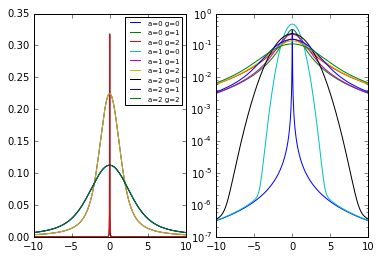

In [11]:
alpha = np.linspace(0.0001,2,3)
gamma = np.linspace(0.0001,2,3)
u = np.linspace(-10,10,1000)

plt.subplot(121)
for a in alpha:
    for g in gamma:
        plt.plot(u,V(u,a,a), label="a={} g={}".format(int(a),int(g)))


plt.legend(prop={'size':7})
plt.subplot(122)    
for a in alpha:
    for g in gamma:
        plt.semilogy(u,V(u,a,g), label="a={} g={}".format(a,g))



We can see that when  $\alpha$ is larger than $\gamma$ the Voigt function is more Gaussian and when $\gamma$ is larger, it becomes a Lorentzian

** Now with the approximation in eq. 18 in order to be able to answer questions better:**

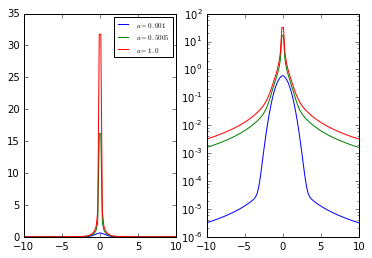

In [12]:
def V2(a,u):
    #v = (np.exp(-u**2) + a/(np.sqrt(np.pi)*u**2))/np.sqrt(np.pi)
    v = (1. / np.sqrt(np.pi)) * (np.exp(-u**2.) + a/(np.sqrt(np.pi)*u**2.))
    return v


alpha = np.linspace(0.001,1,3)
#u = np.arange(201)/10. - 10.
u = np.linspace(-10,10,100)

plt.subplot(121)
for a in alpha:
    plt.plot(u,V2(a,np.abs(u)), label="$a={}$".format(a))


plt.legend(prop={'size':7})
plt.subplot(122)    
for a in alpha:
    plt.semilogy(u,V2(a,np.abs(u)), label="a={}".format(a))

We can see that as $a$ is larger, the profile becomes more Lorentzian ($1/u^{2}$). If $a$ is smaller, the profile is more Gaussian.

### Emergent line profiles.

**Write an IDL sequence that computes Schuster-Schwarzschild line profiles. Take Tsurface = 5700 K,
Tlayer = 4200 K, a = 0.1,$\lambda = 5000$ Angstrom. These values are good choices for the solar photosphere as
seen in the optical part of the spectrum. First plot a profile $I$ against $u$ for $\tau(0) = 1$:**



**Study the appearance of the line in the spectrum as a function of $\tau0$ over the range log$\tau(0)=-2 \rightarrow$ log$\tau(0) = 2$:**

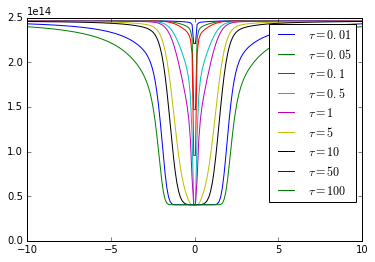

In [13]:
plt.figure()
Ts=5700 # solar surface temperature
Tl=4200 # solar T-min temperature = `reversing layer'
a=0.1 # damping parameter
wav=5000e-8 # wavelength in cm
tau0=1 # reversing layer thickness at line center
#u=np.arange(201)/10.-10. # u = -10 to 10 in 0.1 steps
u = np.linspace(-10,10,200)
integ=np.zeros_like(u) # declare array
for i in range(200):
    tau=tau0 * V2(a,abs(u[i]))
    integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))

#plt.plot(u,integ)

tau0=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for t in tau0:
    for i in range(200):
        tau = t*V2(a,abs(u[i])) 
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    plt.plot(u,integ, label='$\\tau = {}$'.format(t))

plt.legend()
plt.show()

**How do you explain the profile shapes for $\tau \ll 1$?**

The profiles are much thinner and are have small wings and are gaussian dominated.

**Why is there a low-intensity saturation limit for $\tau \gg 1$?**
The intensity drops to the black body intensity of the cooler layer (not surface) at and around line center.

**Why do the line wings develop only for very large $\tau(0)$?**
As $\tau$ increases, the line saturates and doesnt develope wings until the optical depth is high enough that the density is high enough that other processes like pressure broadening take over. 

**Where do the wings end?**
They go on forever but diminish asymptotically.

**For which values of $\tau(0)$ is the layer optically thin, respectively optically thick, at line center? And at $u = 5$?**
For values $\gt \tau(0) \approx 1$ the layer becomes optically thick at linecenter. The wings become optically thick when there is a deviation from the continuum so $\tau(0) \approx 50$


**Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda = 2000$ Angstroms
(ultraviolet) and $\lambda = 10000$ Angstroms (near infrared). What sets the top value $I_{cont}$ and the limit value reached at line center by $I(0)$?**

 $I_{cont}$ is set by the blackbody emission from the surface while $I(0)$ at line center is set by the blackbody of the layer.  

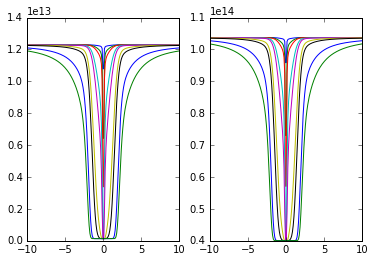

In [14]:
Ts=5700 # solar surface temperature
Tl=4200 # solar T-min temperature = `reversing layer'
a=0.1 # damping parameter
wav=2000e-8 # wavelength in cm
tau0=1 # reversing layer thickness at line center
#u=np.arange(201)/10.-10. # u = -10 to 10 in 0.1 steps
u = np.linspace(-10,10,200)
integ=np.zeros_like(u) # declare array
for i in range(200):
    tau=tau0 * V2(a,abs(u[i]))
    integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))

#plt.plot(u,integ)

tau0=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for t in tau0:
    for i in range(200):
        tau = t*V2(a,abs(u[i])) 
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    plt.subplot(121)
    plt.plot(u,integ, label='$\\tau = {}$'.format(t))
wav=10000e-8 # wavelength in cm
for t in tau0:
    for i in range(200):
        tau = t*V2(a,abs(u[i])) 
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    plt.subplot(122)
    plt.plot(u,integ, label='$\\tau = {}$'.format(t))

In the ultraviolet region (2000 Angstroms) the continuum emission is about 10 times less than in the infrared (10000 Angstroms).

**Check these values by computing them directly on the command line. What happens to these values at other wavelengths?**

I = 1e+14 at 2e-05 Angstroms
I = 1.1e+14 at 0.0001 Angstroms
I = 2.1e+12 at 1e-05 Angstroms
I = 1.5e+13 at 0.0002 Angstroms


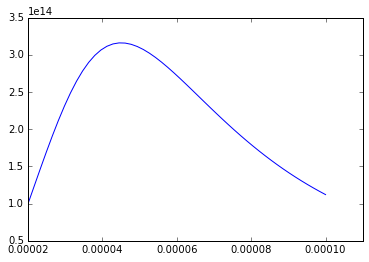

In [24]:
wav = 2000e-8
p = planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
print 'I = {:.2} at {} Angstroms'.format(p,wav)

wav = 10000e-8
p = planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
print 'I = {:.2} at {} Angstroms'.format(p,wav)

wav = 1000e-8
p = planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
print 'I = {:.2} at {} Angstroms'.format(p,wav)

wav = 20000e-8 
p = planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
print 'I = {:.2} at {} Angstroms'.format(p,wav)

wav = np.linspace(2000e-8,10000e-8)
plt.plot(wav,planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau)))
plt.show()


At other wavelengths it traces out the Blackbody with $T = T_{surface}$

**Observed spectra that are measured in detector counts without absolute intensity calibration (as in
your Clea-Spec data gathering in Exercise 1) are usually scaled to the local continuum intensity by
plotting $I_{\lambda}/I_{cont}$ against wavelength. Do that for the above profiles at the same three wavelengths:**

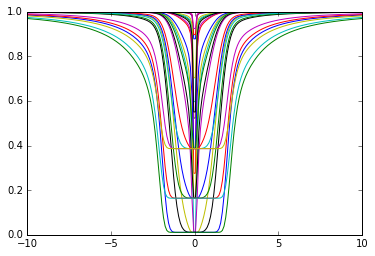

In [16]:
waves = np.array([2000, 5000, 10000])*1e-8 # Angstrom
for wav in waves:
    for t in tau0:
        for i in range(200):
            tau = t*V2(a,abs(u[i])) 
            integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
        integ=integ/planck(Ts,wav) # convert into relative intensity
        plt.plot(u,integ)

**Explain the wavelength dependencies in this plot.**

There are not wavelength dependencies in this plot since whe have normalized to them.?????

## 3.4 The equivalent width of spectral lines

In [17]:
wav=5000.E-8
Ts=5700
Tl=4200
def profile(a,tau0,u):
    """ 
    return a Schuster-Schwarzschild profile
    input: a = damping parameter
        tau0 = SS layer thickness at line center
        u = wavelength array in Doppler units
    output: int = intensity array
    """
    
    integ=np.zeros_like(u)
    usize=len(u) # IDL SIZE returns array type and dimensions
    for i in range(usize):
        tau=tau0 * V2(a,abs(u[i]))
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1-np.exp(-tau))
    return integ

**Check your routine:**

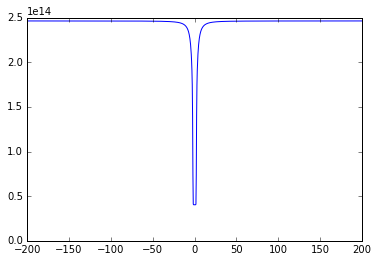

In [18]:
Ts=5700
Tl=4200
u = np.arange(-200,200,0.4)
a = 0.1
tau0 = 1e2
integ = profile(a,tau0,u)
plt.plot(u,integ)
plt.show()

**Continue by computing the equivalent width with the IDL TOTAL function (same as numpy sum()):**

equivalent width = 5.8


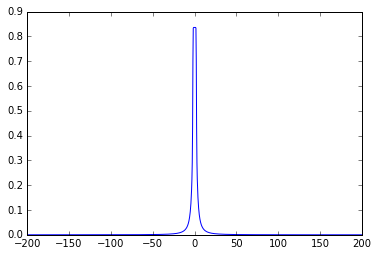

In [19]:
reldepth = (integ[0] - integ)/integ[0]
plt.plot(u,reldepth)
eqw = np.sum(reldepth)*0.4
print 'equivalent width = {:.2}'.format(eqw)

## 3.5 The curve of growth

**Compute and plot a curve of growth by plotting log$W_{\lambda}$ against log$\tau(0)$:**

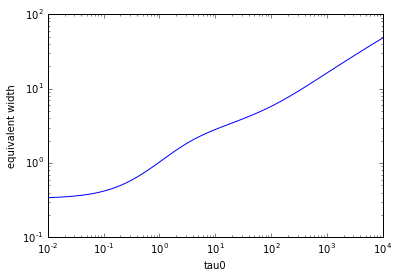

In [21]:
Ts=5700
Tl=4200
tau0 = 10**(np.arange(0,61,1)/10 - 2)
eqw = np.zeros_like(tau0)
a=0.1
for i,t in enumerate(tau0):
    integ = profile(a,t,u)
    reldepth = (integ[0] - integ)/integ[0]
    eqw[i] = np.sum(reldepth)*0.4

plt.loglog(tau0,eqw)
plt.xlabel('tau0')
plt.ylabel('equivalent width')
plt.show()

**Explain what happens in the three different parts.**
In the low opacity limit, the equivalent width grows as the line depth grows. As $\tau \rightarrow 1$ the line profile begins to saturate and the growth slows. At high opacity the wings grow due to the opacity becoming high enough for high density processes take over therefore increasing the equivalent width. 

**The first part has slope 1:1, the third part has slope 1:2 in this log-log plot. Why?**
The first part of the slope increses linearly as the population of ground state systems increase (as in Lab2). The third part has a different slope due to the fact that the wings are being filled out and is no longer linearly dependent on the population of the lower state. 

**Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with Figure 14.** It is caused by $a$ as it determines the strength of the Lorentzian. It appears to be similar to our plots thus the solar iron lines should have $a \approx 0.1$.

**Final question: of which parameter should you raise the numerical value in order to produce emission
lines instead of absorption lines? Change it accordingly and rerun your programs to produce emission profiles and an emission-line curve of growth. Avoid plotting negative W values logarithmically by:** 

By changing the temperature of the layer $T_{layer}$ to be greater than the surface temperature we get emission lines.

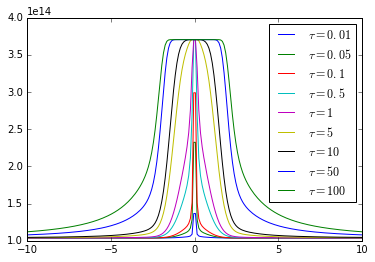

In [22]:
Ts=5700 # solar surface temperature
Tl=10000 # solar T-min temperature = `reversing layer'

def profile2(a,tau0,u):
    """ 
    return a Schuster-Schwarzschild profile
    input: a = damping parameter
        tau0 = SS layer thickness at line center
        u = wavelength array in Doppler units
    output: int = intensity array
    """
    integ=np.zeros_like(u)
    usize=len(u) # IDL SIZE returns array type and dimensions
    for i in range(usize):
        tau=tau0 * V2(a,abs(u[i]))
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    return integ


a=0.1 # damping parameter
wav=10000e-8 # wavelength in cm
tau0=1 # reversing layer thickness at line center
#u=np.arange(201)/10.-10. # u = -10 to 10 in 0.1 steps
u = np.linspace(-10,10,200)
integ=np.zeros_like(u) # declare array
for i in range(200):
    tau=tau0 * V2(a,abs(u[i]))
    integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))

#plt.plot(u,integ)

tau0=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for t in tau0:
    for i in range(200):
        tau = t*V2(a,abs(u[i])) 
        integ[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    plt.plot(u,integ, label='$\\tau = {}$'.format(t))

plt.legend()
plt.show()


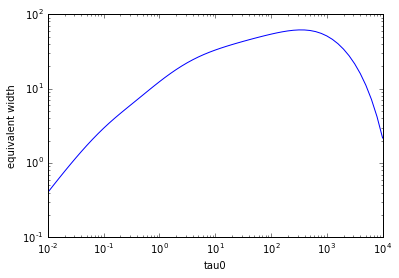

In [23]:
plt.figure()
tau0 = 10**(np.arange(0,61,1)/10 - 2)
eqw = np.zeros_like(tau0)
for i,t in enumerate(tau0):
    integ = profile2(a,t,u)
    reldepth = (integ[0] - integ)/integ[0]
    eqw[i] = np.sum(reldepth)*0.4

plt.loglog(tau0,abs(eqw))
plt.xlabel('tau0')
plt.ylabel('equivalent width')
plt.show()
